<a href="https://colab.research.google.com/github/migvanderlei/rna-1-2/blob/main/rna_covid19_manaus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv("https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv", sep=';', 
                    parse_dates=['_dt_evolucao', '_dt_notificacao', '_dt_sintomas']
                   )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
0,2020-01-25,2020-03-01,2020-01-01,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,4.0,1a - 4a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
1,2020-03-01,2020-03-01,2020-01-01,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,26.0,20a - 29a,NaN,NaN,Parda,1.0,F,Sim,Sim,Sim,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
2,2020-05-01,2020-03-01,2020-03-01,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,27.0,20a - 29a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
3,2020-01-16,2020-08-01,2020-04-01,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,94.0,80a ou +,NaN,NaN,Parda,2.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
4,2020-11-01,2020-08-01,2020-05-01,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,0.0,< 1a,NaN,NaN,Parda,2.0,M,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"


# Visão Geral dos Casos Confirmados

Filtrando apenas casos confirmados

In [6]:
data['_classificacao'].value_counts()

Descartado    126563
Confirmado     80420
Em análise     37001
Name: _classificacao, dtype: int64

In [7]:
data = data[data['_classificacao'] == 'Confirmado']

In [8]:
data.sample(5)

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
154618,NaT,2020-09-10,2020-10-09,Confirmado,NaN,"eSUS VE, GAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,30a - 39a,NaN,NaN,Ignorado,41.0,M,NaN,NaN,NaN,Sim,NaN,NaN,1.0,NaN,2.0,PARQUE,PARQUE 10 DE NOVEMBRO,SUL,"0,228326141"
111597,2020-08-28,2020-05-22,2020-08-05,Confirmado,Recuperado,"eSUS VE,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,30a - 39a,NaN,NaN,Branca,21.0,M,NaN,Sim,NaN,Sim,NaN,NaN,1.0,NaN,NaN,PLANALTO,PLANALTO,OESTE,"0,507022258"
49833,2020-09-15,2020-04-09,2020-08-14,Confirmado,Recuperado,"eSUS VE,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,30a - 39a,NaN,NaN,Amarela,36.0,M,NaN,Sim,Sim,Sim,NaN,NaN,1.0,NaN,NaN,TANCREDO NEVES,TANCREDO NEVES,LESTE,"0,169058849"
166301,2020-08-24,2020-08-24,2020-11-08,Confirmado,Recuperado,"eSUS VE,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,30a - 39a,NaN,NaN,Parda,35.0,M,NaN,NaN,NaN,Sim,Sim,NaN,2.0,NaN,NaN,COMPENSA III,COMPENSA,OESTE,"0,108867236"
198318,NaT,2020-02-06,2020-10-05,Confirmado,NaN,"eSUS VE,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,70a - 79a,NaN,NaN,Branca,23.0,F,NaN,Sim,Sim,Sim,NaN,NaN,1.0,NaN,NaN,DISTR. INDUSTRIAL,NaN,NaN,NaN


**Quantos atributos descrevem cada exemplo? Quais são eles?**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80420 entries, 130 to 243982
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   _dt_evolucao          47739 non-null  datetime64[ns]
 1   _dt_notificacao       80395 non-null  datetime64[ns]
 2   _dt_sintomas          78922 non-null  datetime64[ns]
 3   _classificacao        80420 non-null  object        
 4   _conclusao            42774 non-null  object        
 5   _origem               80420 non-null  object        
 6   _comorb_cardio        6071 non-null   object        
 7   _comorb_cromossomica  185 non-null    object        
 8   _comorb_diabetes      4763 non-null   object        
 9   _comorb_hemato        100 non-null    object        
 10  _comorb_hepatica      84 non-null     object        
 11  _comorb_imuno         813 non-null    object        
 12  _comorb_neurologica   297 non-null    object        
 13  _comorb_obess

**Quantos casos confirmados há em Manaus, cumulativamente?**

80.420

**A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.**

Caso mais antigo: 04/01/2020

In [10]:
data['_dt_notificacao'].min()

Timestamp('2020-01-04 00:00:00')

Caso mais recente: 29/12/2020

In [11]:
data['_dt_notificacao'].max()

Timestamp('2020-12-29 00:00:00')

# Limpeza de dados

Vamos remover atributos que não são úteis para as análises propostas neste projeto, assim como remover linhas em que aparecem campos vazios (`NaN`, `NaT`).

Removendo colunas com informações irrelevantes, o que inclui: `_dt_sintomas`, `_profiss_saude`, `_etnia`, `_raca`, `_gestante`, `_se_notificacao`, `_srag`, `_taxa`, `_criterio`, `_origem`, `_evolução` e todas as colunas que começam com `_sintoma` ou `_comorb`.


In [12]:
data['_teste_anticorpo'].fillna(0, inplace = True)
data['_teste_antigeno'].fillna(0, inplace = True)
data['_teste_pcr'].fillna(0, inplace = True)


In [13]:
columns_to_remove = ['_dt_sintomas', '_profiss_saude', 
                     '_etnia', '_raca', '_gestante', '_se_notificacao', 
                     '_srag', '_taxa', '_criterio', '_origem', '_evolução']

columns_to_remove += [
                        column for column in data.columns 
                        if column.startswith('_sintoma') 
                        or column.startswith('_comorb') 
                      ]

In [14]:
data = data.drop(columns_to_remove, axis=1)

Removendo todas as linhas que possuem valores nulos, como `NaN` e `NaT` (para os casos de colunas com dados temporais).

In [15]:
data = data.dropna()

In [16]:
data.to_csv('Manaus-preprocessed.csv', sep=';')

# Análises pós-limpeza

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41675 entries, 130 to 225161
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _dt_evolucao      41675 non-null  datetime64[ns]
 1   _dt_notificacao   41675 non-null  datetime64[ns]
 2   _classificacao    41675 non-null  object        
 3   _conclusao        41675 non-null  object        
 4   _idade            41675 non-null  float64       
 5   _faixa etária     41675 non-null  object        
 6   _sexo             41675 non-null  object        
 7   _teste_anticorpo  41675 non-null  float64       
 8   _teste_antigeno   41675 non-null  float64       
 9   _teste_pcr        41675 non-null  float64       
 10  _bairro           41675 non-null  object        
 11  _bairro_mapa      41675 non-null  object        
 12  _distrito         41675 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 4.5+ MB


In [17]:
data = pd.read_csv('Manaus-preprocessed.csv', sep=';')

**Qual a porcentagem de indivíduos recuperados em relação ao todo?**

91,89%

In [ ]:
data["_conclusao"].value_counts(normalize=True) * 100

Recuperado                 91.892022
Óbito                       7.973605
Óbito por outras causas     0.134373
Name: _conclusao, dtype: float64

**Os casos acometeram mais indivíduos do sexo masculino ou feminino?**

Feminino

In [ ]:
data.groupby(by="_sexo").size()

_sexo
F    22357
M    19318
dtype: int64

**Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?**

Média: 43,48

Desvio Padrão: 17,38

Indivíduo mais jovem: 0

Indivíduo mais idoso: 120

In [ ]:
data['_idade'].mean()

43.47652069586083

In [ ]:
data['_idade'].std()

17.376358811650032

In [ ]:
data['_idade'].min()

0.0

In [ ]:
data['_idade'].max()

120.0

**Qual o bairro com maior incidência de casos?**

São José Operário

In [ ]:
data.groupby(by="_bairro_mapa").size().sort_values(ascending=False)

_bairro_mapa
SÃO JOSÉ OPERÁRIO          2351
CIDADE NOVA                2318
ALVORADA                   2015
COMPENSA                   2008
JORGE TEIXEIRA             1987
                           ... 
NOSSA SENHORA APARECIDA      76
RIO NEGRO                    24
BR-174                       24
AM-010                        6
RIO TARUMÃ-MIRIM              3
Length: 67, dtype: int64

**Quais os três bairros com maior incidência de casos recuperados?**



1.   São José Operário
2.   Cidade Nova
3.   Alvorada



In [ ]:
data.groupby(["_bairro_mapa", "_conclusao"]).size().sort_values(ascending=False)

_bairro_mapa         _conclusao             
SÃO JOSÉ OPERÁRIO    Recuperado                 2234
CIDADE NOVA          Recuperado                 2079
ALVORADA             Recuperado                 1872
JORGE TEIXEIRA       Recuperado                 1863
COMPENSA             Recuperado                 1846
                                                ... 
FLORES               Óbito por outras causas       1
DA PAZ               Óbito por outras causas       1
CRESPO               Óbito por outras causas       1
COMPENSA             Óbito por outras causas       1
MONTE DAS OLIVEIRAS  Óbito por outras causas       1
Length: 166, dtype: int64

**Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.**

In [ ]:
teste_anticorpo = len(data[data["_teste_anticorpo"] > 0])
print("Teste Anticorpo:", teste_anticorpo, "\nPorcentagem:",100*teste_anticorpo/len(data))
teste_antigeno = len(data[data["_teste_antigeno"] > 0])
print("\nTeste Antigeno:", teste_antigeno, "\nPorcentagem:",100*teste_antigeno/len(data))
teste_pcr = len(data[data["_teste_pcr"] > 0])
print("\nTeste PCR:", teste_pcr, "\nPorcentagem:",100*teste_pcr/len(data))

Teste Anticorpo: 25962 
Porcentagem: 62.29634073185363

Teste Antigeno: 4053 
Porcentagem: 9.725254949010198

Teste PCR: 11798 
Porcentagem: 28.309538092381523


**Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos;**

In [ ]:
100 * len(data[data["_conclusao"] == "Óbito"])/len(data)

7.973605278944211

**Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.**

É uma correlação negativa, com intensidade igual a -0,345

In [ ]:
idade = data.groupby(by="_idade").size().reset_index(name='qtde')

In [ ]:
idade.corr()

,_idade,qtde
_idade,1.000000,-0.345031
qtde,-0.345031,1.000000


# Visualização de Dados

**1. Percentual de casos por bairro, evidenciando os 10 bairros com maior incidência.**

In [ ]:
top_10_labels = data["_bairro_mapa"].value_counts().index[:10]
hist_data = data[data["_bairro_mapa"].isin(top_10_labels)]['_bairro_mapa'].value_counts()/len(data) * 100
hist_data["OUTROS"] = len(data[~data["_bairro_mapa"].isin(top_10_labels)])/len(data) * 100
hist_df = pd.DataFrame(data=
                       {
                           "Bairro": hist_data.index,
                           "Casos confirmados (%)": hist_data.values
                       })

In [ ]:
hist_df

,Bairro,Casos confirmados (%)
0,SÃO JOSÉ OPERÁRIO,5.641272
1,CIDADE NOVA,5.562088
2,ALVORADA,4.835033
3,COMPENSA,4.818236
4,JORGE TEIXEIRA,4.767846
5,COROADO,4.362328
6,TARUMÃ,3.200960
7,FLORES,2.953809
8,PARQUE 10 DE NOVEMBRO,2.764247
9,TANCREDO NEVES,2.689862


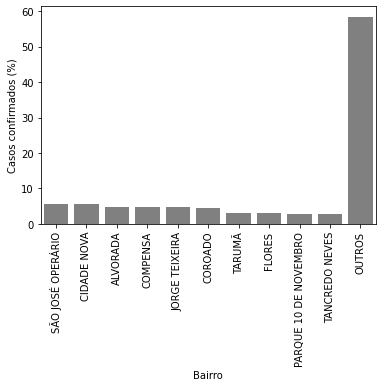

In [ ]:
ax = sns.barplot(data=hist_df, y='Casos confirmados (%)', x='Bairro', color='gray')
ax.tick_params(axis='x', rotation=90)

**2. Boxplot de idade dos pacientes confirmados, por sexo**

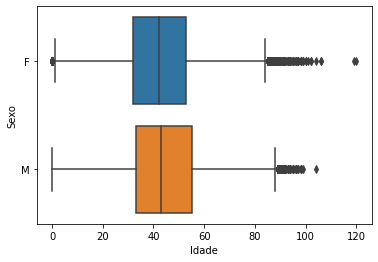

In [ ]:
ax = sns.boxplot(y="_sexo", x="_idade", data=data,)
ax.set_xlabel("Idade")
ax.set_ylabel("Sexo")
ax

**3. Número de novos casos nos últimos 10 dias presentes na base de dados.**

In [ ]:
last_10_days = data['_dt_notificacao'].unique().tolist()
last_10_days.sort()
last_10_days = last_10_days[-10:]

In [ ]:
values_last_10_days = data[data['_dt_notificacao'].isin(last_10_days)]
values_last_10_days = values_last_10_days['_dt_notificacao'].value_counts().values

df_last_10_days = pd.DataFrame({
    'Dia': last_10_days,
    'Número de Casos': values_last_10_days
})

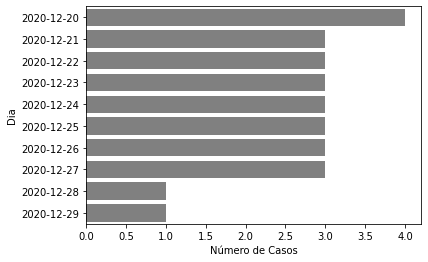

In [ ]:
sns.barplot(data=df_last_10_days, y='Dia', x="Número de Casos", color='gray')

**4. Número de casos recuperados nos últimos 10 dias presentes na base de dados.**



> OBS: O intervalo considerado vai de 29/11/2020 até 11/12/2020, pois após essa data, não existem registros de casos recuperados na base.



In [ ]:
values_last_10_days = data[data['_dt_evolucao'].isin(last_10_days)]
values_last_10_days = values_last_10_days['_conclusao'].value_counts()

values_last_10_days

Óbito                      86
Óbito por outras causas     2
Name: _conclusao, dtype: int64

In [ ]:
last_10_days_recuperados = data[data['_conclusao'] == 'Recuperado']['_dt_evolucao'].unique().tolist()
last_10_days_recuperados.sort()
last_10_days_recuperados = last_10_days_recuperados[-10:]

values_last_10_days = data[data['_dt_evolucao'].isin(last_10_days_recuperados)]

values_last_10_days = values_last_10_days['_dt_evolucao'].value_counts()

df_last_10_days = pd.DataFrame({
    'Dia': last_10_days_recuperados,
    'Número de Casos Recuperados': values_last_10_days
})

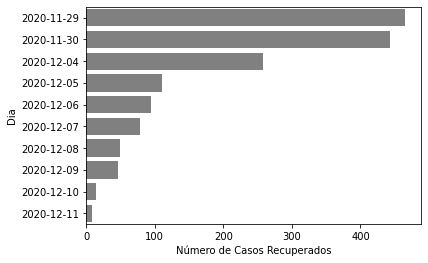

In [ ]:
sns.barplot(data=df_last_10_days, y='Dia', x="Número de Casos Recuperados", color='gray')

**Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);**

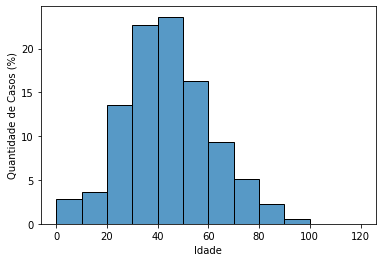

In [ ]:
ax = sns.histplot(data=data["_idade"], stat="percent", bins = 12)
ax.set_xlabel("Idade")
ax.set_ylabel("Quantidade de Casos (%)")
ax

**Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;**



In [19]:
dias = data['_dt_notificacao'].unique().tolist()
dias.sort()

casos_diarios = data[data['_dt_notificacao'].isin(dias)]
casos_diarios = casos_diarios['_dt_notificacao'].value_counts().values
casos_acumulados = casos_diarios.cumsum()


df_casos_acumulados = pd.DataFrame({
    'Dia': dias,
    'Número de Casos Acumulados': casos_acumulados
})

In [20]:

import plotly.graph_objects as go

fig = go.Figure([go.Line(x=df_casos_acumulados['Dia'], y=df_casos_acumulados["Número de Casos Acumulados"], name='Casos Acumulados', marker=dict(color='gray'))])
fig.show()

#ax.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




**Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?**



In [ ]:
idade = data['_idade'].unique().tolist()
idade.sort()

qtde = data['_idade'].value_counts().values



df_idade = pd.DataFrame({
    'Idade': idade,
    'Número Total de Casos': qtde
})

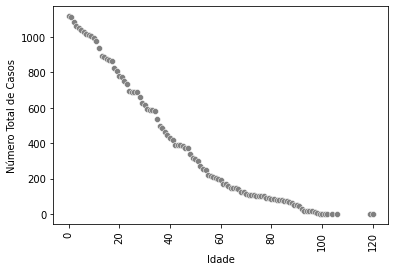

In [ ]:
ax = sns.scatterplot(data=df_idade, x='Idade', y="Número Total de Casos", color='gray')
ax.tick_params(axis='x', rotation=90)